<a href="https://colab.research.google.com/github/pransil/pytorch-unet/blob/master/pytorch_unet_resnet18_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pytorch-uent

https://github.com/usuyama/pytorch-unet

In [1]:
import os

if not os.path.exists("pytorch_unet.py"):
  if not os.path.exists("pytorch_unet"):
    !git clone https://github.com/pransil/pytorch-unet.git

  %cd pytorch-unet

In [2]:
!ls

LICENSE                           pytorch_fcn.ipynb
README.md                         pytorch_resnet18_unet.ipynb
__pycache__                       pytorch_unet.ipynb
data_test.py                      pytorch_unet.py
helper.py                         pytorch_unet_resnet18_colab.ipynb
images                            simulation.py
loss.py                           simulation2.py


## Enabling GPU on Colab

Need to enable GPU from Notebook settings

- Navigate to Edit-Notebook settings menu
- Select GPU from the Hardware Accelerator dropdown list


In [3]:
import torch

if not torch.cuda.is_available():
  raise Exception("GPU not availalbe. CPU training will be too slow.")

print("device name", torch.cuda.get_device_name(0))

Exception: GPU not availalbe. CPU training will be too slow.

## Synthetic images for demo training

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation2
import data_test


t[1]= [(1, 1), (1, 1), (1, 1)]
increments len= 3
track len= 10
track= [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


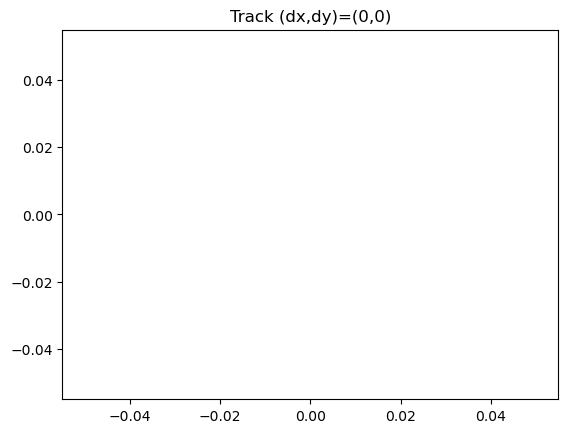

increments len= 3
track len= 10
track= [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


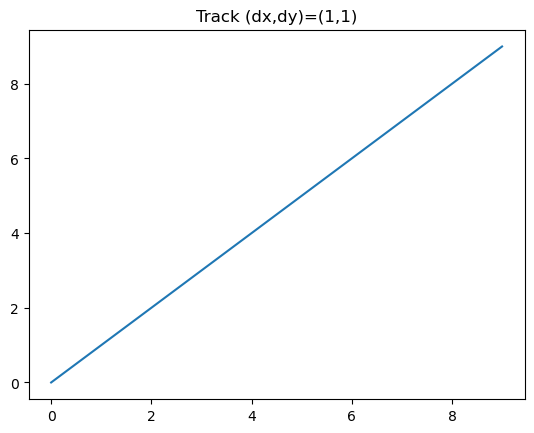

increments len= 3
track len= 10
track= [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]


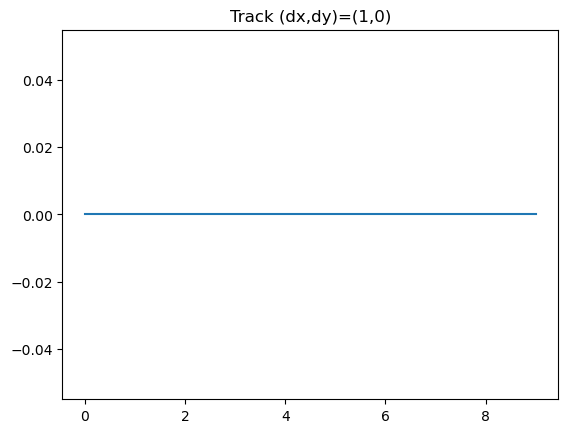

In [24]:

def setup_increments():
    t0 = [(0,0),(0,0),(0,0)]            # Does not move
    t1 = [(1,1),(1,1),(1,1)]            # Up-right
    t2 = [(1,0),(1,0),(1,0)]            # Right
    t3 = [(0,1),(0,1),(0,1)]            # Up
    t4 = [(1,-1),(1,-1),(1,-1)]         # Down-right
    t5 = [(0,-1),(0,-1),(0,-1)]         # Down
    t6 = [(-1,1),(-1,1),(-1,1)]        # Up-left
    t7 = [(-1,0),(-1,0),(-1,0)]        # Left
    t8 = [(-1,-1),(-1,-1),(-1,-1)]     # Down-left
    t = [t0,t1,t2,t3,t4,t5,t6,t7,t8]
    return t

# Generate and 9 plot tracks
t = setup_increments()
print("t[1]=", t[1])
for i in range(len(t)-6):
    data_test.generate_and_plot_track(0,0,t[i],10)



In [ ]:
# Generate a sequence of images from a track
def generate_img(height, width, x, y):
    # For now, just a single square
    size = 4
    square_location = (x, y, size)
    
    # Create input image
    arr = np.zeros((height, width), dtype=bool)
    arr = simulation2.add_filled_square(arr, *square_location)
    arr = np.reshape(arr, (1, height, width)).astype(np.float32)

    return arr


def generate_image_sequence(track, height, width, x0, y0):
    sequence = []
    x = x0
    y = y0
    for i in range(0, len(track)):
        x = x + track[i][0]
        y = y + track[i][1]
        # If x or y is out of bounds, stop
        if x < 0 or x >= width or y < 0 or y >= height:
            print("Out of bounds at ", x, y, "for image ", i)
            break
        sequence.append(generate_img(height, width, x, y))
        print("Completed track image ", i)
    return sequence

# Generate a sequence of images from each track
def generate_image_sequences(tracks):
    image_sequences = []
    for i in range(len(tracks)):
        image_sequences.append(generate_image_sequence(tracks[i], 18, 18, 0, 0))
    return image_sequences

# Plot an image sequence
def plot_image_sequence(image_sequence):
    print("image_sequence length", len(image_sequence))
    
    for i in range(len(image_sequence)):
        plt.imshow(image_sequence[i][0,:,:])
    #plt.show()


image_sequence_training_set = generate_image_sequences(t)
image_sequence = image_sequence_training_set[1]
print("image_sequence[1]\n", image_sequence[1][0,:,:])

plot_image_sequence(image_sequence[1])


Out of bounds at  1 -1 for image  0
Out of bounds at  0 -1 for image  0
Out of bounds at  -1 1 for image  0
Out of bounds at  -1 0 for image  0
Out of bounds at  -1 -1 for image  0
image_sequence[1]
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [4]:


print("input_images shape and range", input_images.shape, input_images.min(), input_images.max())
print("target_masks shape and range", target_masks.shape, target_masks.min(), target_masks.max())

# Change channel-order and make 3 channels for matplot
input_images_rgb = [x.astype(np.uint8) for x in input_images]

# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in target_masks]

input_images shape and range (3, 192, 192, 3) 0 255
target_masks shape and range (3, 6, 192, 192) 0.0 1.0


# Left: Input image (black and white), Right: Target mask (6ch)

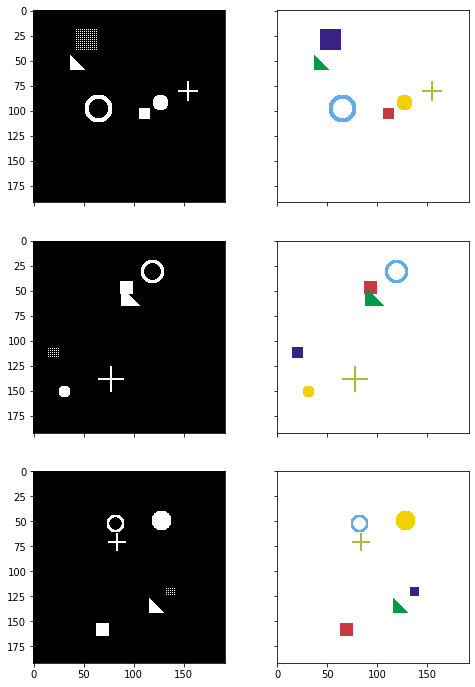

In [5]:
helper.plot_side_by_side([input_images_rgb, target_masks_rgb])

## Prepare Dataset and DataLoader

In [6]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

class SimDataset(Dataset):
  def __init__(self, count, transform=None):
    self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)
    self.transform = transform

  def __len__(self):
    return len(self.input_images)

  def __getitem__(self, idx):
    image = self.input_images[idx]
    mask = self.target_masks[idx]
    if self.transform:
      image = self.transform(image)

    return [image, mask]

# use the same transformations for train/val in this example
trans = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

train_set = SimDataset(2000, transform = trans)
val_set = SimDataset(200, transform = trans)

image_datasets = {
  'train': train_set, 'val': val_set
}

batch_size = 25

dataloaders = {
  'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
  'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

## Check the outputs from DataLoader

torch.Size([25, 3, 192, 192]) torch.Size([25, 6, 192, 192])


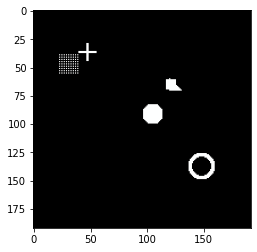

In [7]:
import torchvision.utils

def reverse_transform(inp):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  inp = (inp * 255).astype(np.uint8)

  return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)

plt.imshow(reverse_transform(inputs[3]))

# Define a UNet module

In [8]:
import torch.nn as nn
import torchvision.models


def convrelu(in_channels, out_channels, kernel, padding):
  return nn.Sequential(
    nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
    nn.ReLU(inplace=True),
  )


class ResNetUNet(nn.Module):
  def __init__(self, n_class):
    super().__init__()

    self.base_model = torchvision.models.resnet18(pretrained=True)
    self.base_layers = list(self.base_model.children())

    self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
    self.layer0_1x1 = convrelu(64, 64, 1, 0)
    self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)
    self.layer1_1x1 = convrelu(64, 64, 1, 0)
    self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)
    self.layer2_1x1 = convrelu(128, 128, 1, 0)
    self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)
    self.layer3_1x1 = convrelu(256, 256, 1, 0)
    self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
    self.layer4_1x1 = convrelu(512, 512, 1, 0)

    self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

    self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
    self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
    self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
    self.conv_up0 = convrelu(64 + 256, 128, 3, 1)

    self.conv_original_size0 = convrelu(3, 64, 3, 1)
    self.conv_original_size1 = convrelu(64, 64, 3, 1)
    self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)

    self.conv_last = nn.Conv2d(64, n_class, 1)

  def forward(self, input):
    x_original = self.conv_original_size0(input)
    x_original = self.conv_original_size1(x_original)

    layer0 = self.layer0(input)
    layer1 = self.layer1(layer0)
    layer2 = self.layer2(layer1)
    layer3 = self.layer3(layer2)
    layer4 = self.layer4(layer3)

    layer4 = self.layer4_1x1(layer4)
    x = self.upsample(layer4)
    layer3 = self.layer3_1x1(layer3)
    x = torch.cat([x, layer3], dim=1)
    x = self.conv_up3(x)

    x = self.upsample(x)
    layer2 = self.layer2_1x1(layer2)
    x = torch.cat([x, layer2], dim=1)
    x = self.conv_up2(x)

    x = self.upsample(x)
    layer1 = self.layer1_1x1(layer1)
    x = torch.cat([x, layer1], dim=1)
    x = self.conv_up1(x)

    x = self.upsample(x)
    layer0 = self.layer0_1x1(layer0)
    x = torch.cat([x, layer0], dim=1)
    x = self.conv_up0(x)

    x = self.upsample(x)
    x = torch.cat([x, x_original], dim=1)
    x = self.conv_original_size2(x)

    out = self.conv_last(x)

    return out

## Instantiate the UNet model

- Move the model to GPU if available
- Show model summaries

In [9]:
import torch
import torch.nn as nn
import pytorch_unet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device', device)

model = ResNetUNet(6)
model = model.to(device)

device cuda


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [10]:
model

ResNetUNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [11]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
            Conv2d-5         [-1, 64, 112, 112]           9,408
            Conv2d-6         [-1, 64, 112, 112]           9,408
       BatchNorm2d-7         [-1, 64, 112, 112]             128
       BatchNorm2d-8         [-1, 64, 112, 112]             128
              ReLU-9         [-1, 64, 112, 112]               0
             ReLU-10         [-1, 64, 112, 112]               0
        MaxPool2d-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,864
           Conv2d-14           [-1, 64,

# Define the main training loop

In [12]:
from collections import defaultdict
import torch.nn.functional as F
from loss import dice_loss

checkpoint_path = "checkpoint.pth"

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)

    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            if phase == 'train':
              scheduler.step()
              for param_group in optimizer.param_groups:
                  print("LR", param_group['lr'])

            # save the model weights
            if phase == 'val' and epoch_loss < best_loss:
                print(f"saving best model to {checkpoint_path}")
                best_loss = epoch_loss
                torch.save(model.state_dict(), checkpoint_path)

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(torch.load(checkpoint_path))
    return model

## Training

In [13]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time

num_class = 6
model = ResNetUNet(num_class).to(device)

# freeze backbone layers
for l in model.base_layers:
  for param in l.parameters():
    param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=8, gamma=0.1)

model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train: bce: 0.105508, dice: 0.960730, loss: 0.533119
LR 0.0001
val: bce: 0.021507, dice: 0.793499, loss: 0.407503
saving best model to checkpoint.pth
0m 22s
Epoch 1/9
----------
train: bce: 0.013632, dice: 0.554114, loss: 0.283873
LR 0.0001
val: bce: 0.004518, dice: 0.269733, loss: 0.137125
saving best model to checkpoint.pth
0m 22s
Epoch 2/9
----------
train: bce: 0.003263, dice: 0.147794, loss: 0.075529
LR 0.0001
val: bce: 0.002220, dice: 0.087164, loss: 0.044692
saving best model to checkpoint.pth
0m 22s
Epoch 3/9
----------
train: bce: 0.002458, dice: 0.081096, loss: 0.041777
LR 0.0001
val: bce: 0.001856, dice: 0.059757, loss: 0.030807
saving best model to checkpoint.pth
0m 22s
Epoch 4/9
----------
train: bce: 0.002173, dice: 0.062749, loss: 0.032461
LR 0.0001
val: bce: 0.001647, dice: 0.048988, loss: 0.025317
saving best model to checkpoint.pth
0m 22s
Epoch 5/9
----------
train: bce: 0.001924, dice: 0.052670, loss: 0.027297
LR 0.0001
val: bce: 0.001413, dice: 

## Predict new images using the trained model

In [14]:
import math

model.eval()   # Set model to the evaluation mode

# Create a new simulation dataset for testing
test_dataset = SimDataset(3, transform = trans)
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False, num_workers=0)

# Get the first batch
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.to(device)
print('inputs.shape', inputs.shape)
print('labels.shape', labels.shape)

# Predict
pred = model(inputs)
# The loss functions include the sigmoid function.
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
print('pred.shape', pred.shape)

# Change channel-order and make 3 channels for matplot
input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]

# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in labels.cpu().numpy()]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred]

inputs.shape torch.Size([3, 3, 192, 192])
labels.shape torch.Size([3, 6, 192, 192])
pred.shape (3, 6, 192, 192)


## Left: Input image, Middle: Correct mask (Ground-truth), Rigth: Predicted mask

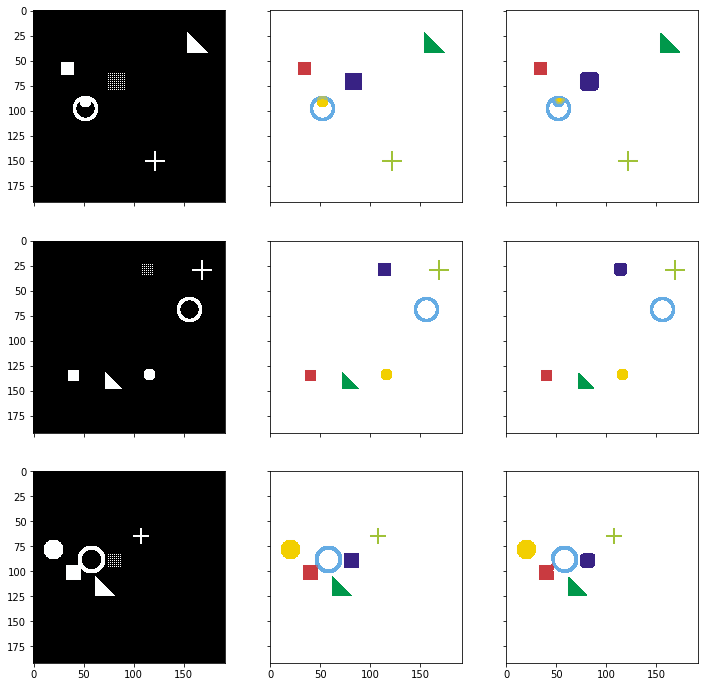

In [15]:
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb])

## Next steps

Try tweaking the hyper-parameters for better accuracy e.g.

- learning rates and schedules
- loss weights
- unfreezing layers
- batch size
- etc.